In [133]:
!which python

/home/ygor/miniconda3/envs/data_visualization/bin/python


In [134]:
google_colab = 'https://colab.research.google.com/notebooks/welcome.ipynb'

In [135]:
kaggle = 'https://www.kaggle.com/datasets/ammaraahmad/immigration-to-canada'

In [136]:
dataset = 'https://github.com/alura-cursos/bibliotecas_visualizacao/blob/main/Dados/imigrantes_canada.csv'

In [137]:
import requests

In [138]:
# Cambiando al url de blob a raw para acceder al arhivo y no la vista web 
url = dataset = 'https://github.com/alura-cursos/bibliotecas_visualizacao/raw/main/Dados/imigrantes_canada.csv'
response = requests.get(dataset)
response.status_code

200

In [139]:
content_type = response.headers.get('Content-Type')
print(content_type)

text/plain; charset=utf-8


In [140]:
import pandas as pd

In [141]:
from io import StringIO

In [142]:
cvs_data = StringIO(response.text)
df = pd.read_csv(cvs_data)
df.head()

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   País        195 non-null    object
 1   Continente  195 non-null    object
 2   Região      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

In [144]:
# Paso 1: Colocar la columna país como index
df.set_index('País', inplace=True)

In [145]:
df.head()


,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argélia,África,Norte da África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


In [146]:
df.to_csv("datos_migratorios.csv", index=True)

In [147]:
# Paso 2: Crear una variable para el intervalo de años
# la función map servirá para mapear los valores como string
# En range simpre usamos la +1 en para el ultimo elemento. Para obterner hasta 2013, en el parametro pasamos 2014
anos = list(map(str, range(1980, 2014)))

In [148]:
# Verificando el resultado
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [149]:
# Paso 3: Obtener solo los datos de Brasil
# para ello vamos a usar la función loc (Permite capturar rotulos especificos)
brasil = df.loc['Brasil', anos]

In [150]:
brasil.head()

1980    211
1981    220
1982    192
1983    139
1984    145
Name: Brasil, dtype: object


Como resultado tuvimos los anos y número de inmigrantes, en formato de serie.  Que convertiremos en un DadaFrame
para ello crearemos un dictionario con los datos de la variable "brasil"

In [151]:
brasil_dict = {
    # 'key' : 'value = brasil.intex.tolist()' // Para convertir los index a una lista
    'ano' : brasil.index.tolist(),
    # 'values' : 'value = brasil.values.tolist()' // Para convertir los valores a lista 
    'inmigrantes' : brasil.values.tolist()
}

#Después que tenemos el diccionario lo convertimos a un dataframe usando pandas
df_brasil = pd.DataFrame(brasil_dict) # Convirtiendo el diccionario a DataFrame()
df_brasil.head() # Visualizando el resultado

,ano,inmigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145


#### Creando Insigths

In [152]:
# Para crear los gráficos usaremos la biblioteca matplolib
import matplotlib.pyplot as plt

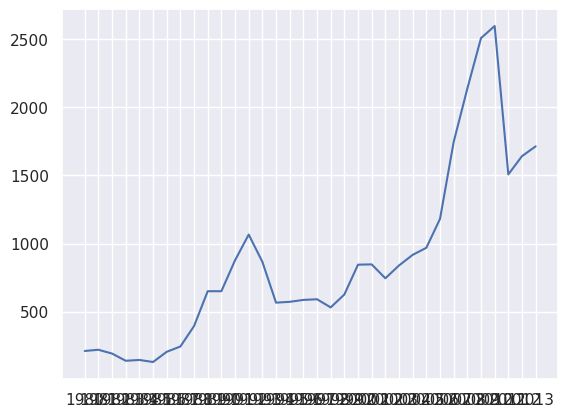

In [153]:
# Para nuestro analisis a ver los cambios atraves de los años, el gráfico que mejor se adapta es un gráfico de lineas
# Usresmo la función plo de plt.
# Crearemos nuestra primera figura.
plt.plot(df_brasil['ano'], df_brasil['inmigrantes'])

#### Mejorando la vizualización del gráfico

In [154]:
# Vamos a crear un rango de cada 5 años para vizualizar mejor
cada_5anos = list(map(str, range(1980, 2014, 5)))
cada_5anos

['1980', '1985', '1990', '1995', '2000', '2005', '2010']

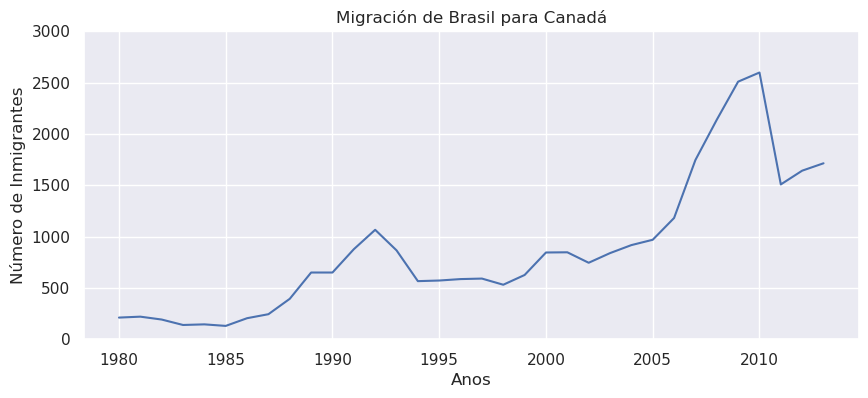

In [155]:
plt.figure(figsize=(10,4)) # Con figure podemos configurar el tamaño del gráfico (La medida es pulgadas)
plt.plot(df_brasil['ano'], df_brasil['inmigrantes'])
plt.title('Migración de Brasil para Canadá')
plt.ylabel('Número de Inmigrantes')
plt.xlabel('Anos')
plt.xticks(cada_5anos) # Usamo xticks para agregar la lista de años que creamos.
plt.yticks(list(range(0,3001,500))) # Aqui pasamos una lista con los rangos de queremos reflejar
plt.show() ### Este codigo permite mostrar la visualización del grafico sin mostrar las informaciones de memoria.
# La función show debe ser colocada siempre al final, si esta se coloca antes no mostrará el resto del grafico

### Personalizar el grafico con Subplot

(<Figure size 640x480 with 1 Axes>, <Axes: >)

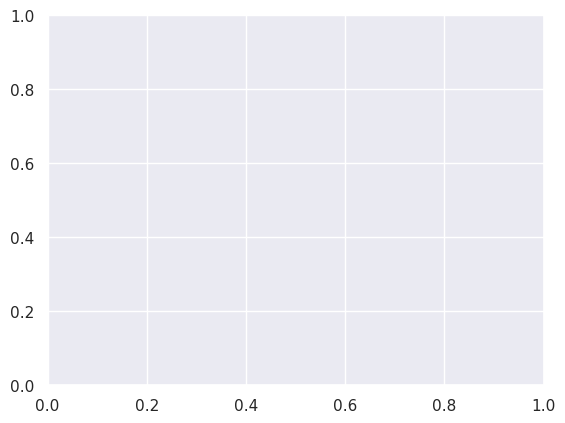

In [156]:
# Para personalizar mas el grafico usamos la funcion subplot de plt
plt.subplots()
# Esto creará una figura en blanco

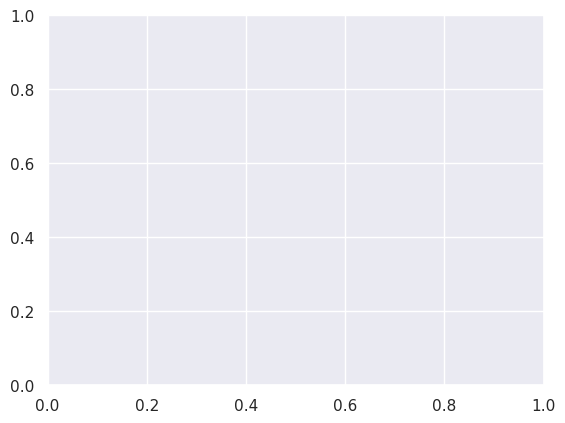

In [157]:
# Atribuiremos dos variables a esa figura que serán fig y ax
# fig permite crear el espacio donde se mostrará el grafico
# ax permite pasar los valores de los ejes

fig, ax = plt.subplots()

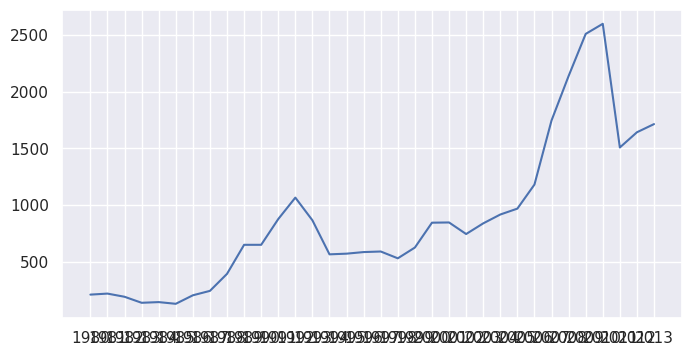

In [158]:
# Podemos modificar el tamaño de la figura, usando el parámetro figsize=()
fig, ax = plt.subplots(figsize=(8,4)) # Esto dará las dimensiones de la figura
ax.plot(df_brasil['ano'], df_brasil['inmigrantes']) # Aqui pasamos los valores que tendrán los ejes ( x, y)
plt.show() #Esto permite imprimir la figura sin mostrar datos de almacenamiento en memoria

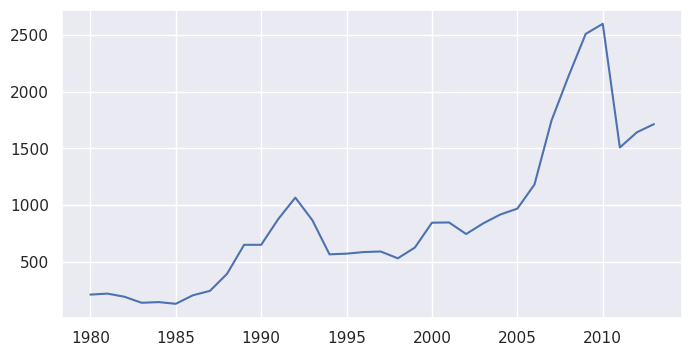

In [159]:
# Ahora que tenemos la figura haremos nuevamente la modificación del eje de los años. 
# Haciendo el grafico de esta manera tenemos la posibilidad de usar mas funciones y personalizar mas el gráfico.
fig, ax = plt.subplots(figsize=(8,4)) # Esto dará las dimensiones de la figura
ax.plot(df_brasil['ano'], df_brasil['inmigrantes']) # Aqui pasamos los valores que tendrán los ejes ( x, y)
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Con esta linea cambiano a la frecuencia de 5 en 5 años para el eje x
plt.show() #Esto permite imprimir la figura sin mostrar datos de almacenamiento en memoria

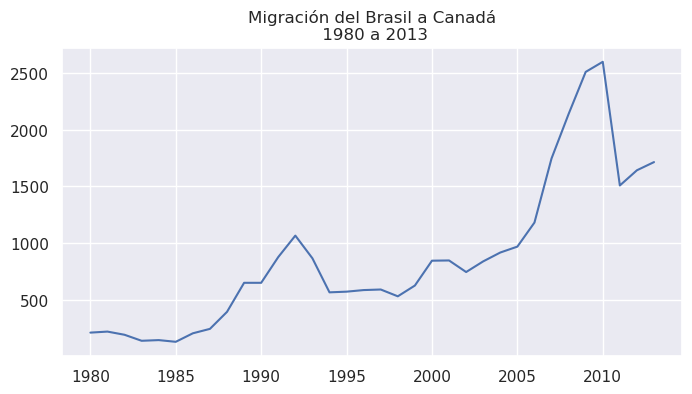

In [160]:
fig, ax = plt.subplots(figsize=(8,4)) # Esto dará las dimensiones de la figura
ax.plot(df_brasil['ano'], df_brasil['inmigrantes']) # Aqui pasamos los valores que tendrán los ejes ( x, y)
ax.set_title('Migración del Brasil a Canadá\n 1980 a 2013') # Usamos la funcion set_title para colocar un titulo. \n para salto de linea
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Con esta linea cambiano a la frecuencia de 5 en 5 años para el eje x
plt.show() #Esto permite imprimir la figura sin mostrar datos de almacenamiento en memoria

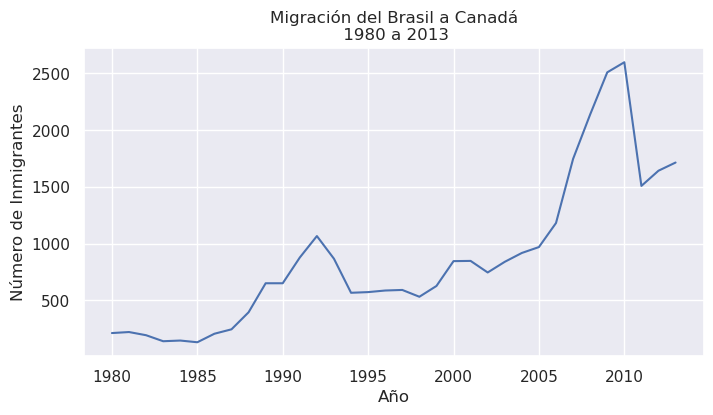

In [161]:
fig, ax = plt.subplots(figsize=(8,4)) # Esto dará las dimensiones de la figura
ax.plot(df_brasil['ano'], df_brasil['inmigrantes']) # Aqui pasamos los valores que tendrán los ejes ( x, y)
ax.set_title('Migración del Brasil a Canadá\n 1980 a 2013') # Usamos la funcion set_title para colocar un titulo. \n para salto de linea
ax.set_xlabel('Año')
ax.set_ylabel('Número de Inmigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Con esta linea cambiano a la frecuencia de 5 en 5 años para el eje x
plt.show() #Esto permite imprimir la figura sin mostrar datos de almacenamiento en memoria

## Creando Subplos en una dirección

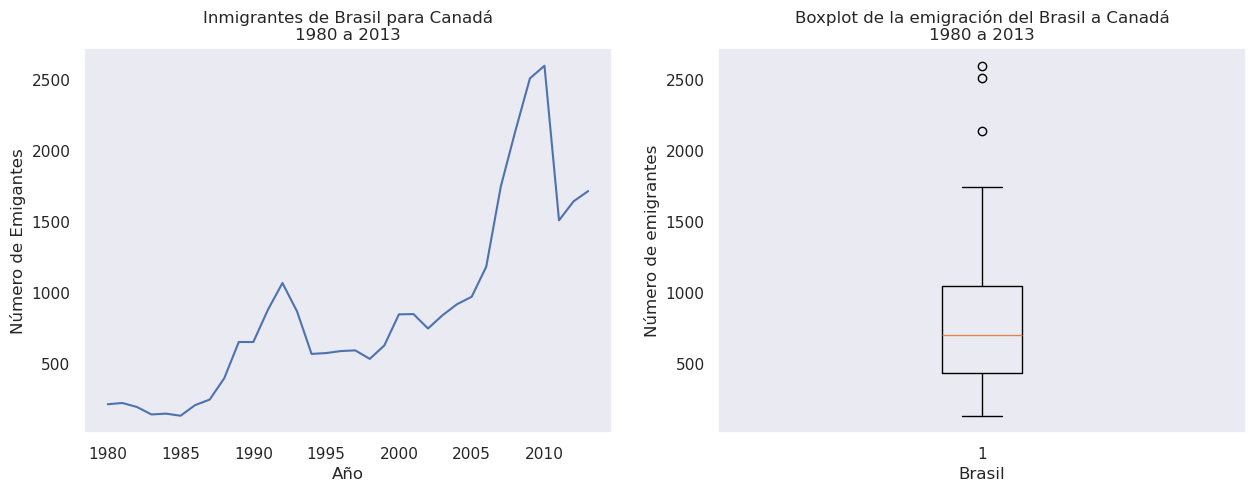

In [162]:
#Vamos a Plotar dos graficos en una misma figura. Dentro del subplot (1, 2) "Una linea y dos columnas"
fig, axs = plt.subplots(1,2, figsize=(15,5)) # fig, el axs (subplot) podemos insertar mas de un grafico

#Primer grafico es axs[0] el valor 0 es el index del grafico 1
axs[0].plot(df_brasil['ano'], df_brasil['inmigrantes']) # Pasamos el origen de los datos para los ejes x e y
axs[0].set_title('Inmigrantes de Brasil para Canadá\n1980 a 2013') #titulo del gráfico
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Número de Emigantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].grid()


#Segundo grafico será un boxplot
axs[1].boxplot(df_brasil['inmigrantes']) # Pasando el argumento para el boxplot
axs[1].set_title('Boxplot de la emigración del Brasil a Canadá\n1980 a 2013') #Titulo
axs[1].set_xlabel('Brasil') #Etiqueta del eje x
axs[1].set_ylabel('Número de emigrantes')
axs[1].grid()

plt.show()


El gráfico de boxplot permite visualizar algunos datos estadisticos como la media, numuero mínimos, máximo, el 25, 50 y 75% de los datos agrupados en valores. Para auxiliarnos podemos usar el método describe() que nos muestra esta información.

In [163]:
df_brasil.describe()

,inmigrantes
count,34.000000
mean,872.323529
std,663.401232
min,130.000000
25%,428.250000
50%,697.500000
75%,1041.750000
max,2598.000000


## Creando Subplots en dos direcciones #1

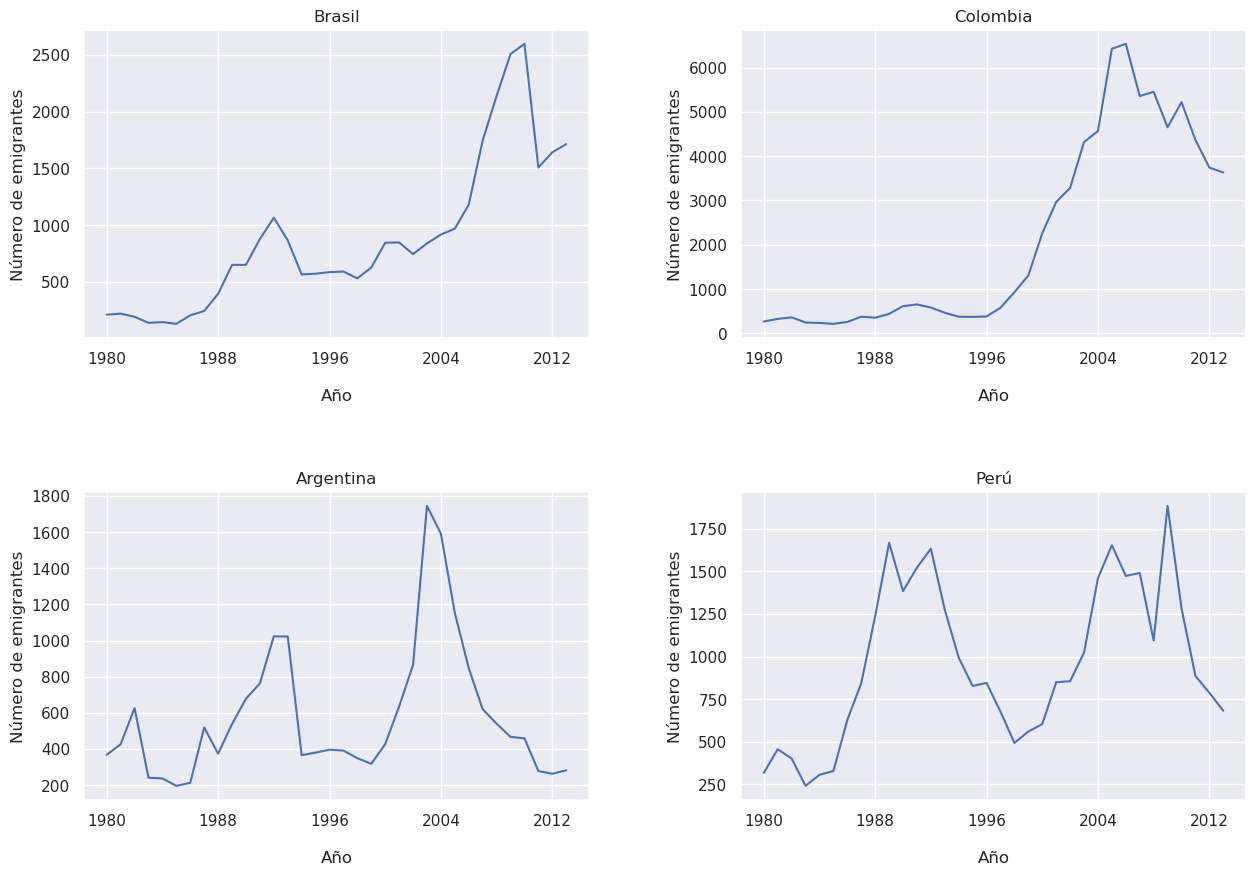

In [164]:
# Para comezar creamos una figura (fig), y axs(ejes)
fig, axs = plt.subplots(2,2, figsize=(15,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3) # Espaciamiento horizontal y vertical entre graficos
# Creando el primer subplots
axs[0,0].plot(df.loc['Brasil', anos])
axs[0,0].set_title('Brasil')

# Creando segundo subplot
axs[0,1].plot(df.loc['Colômbia', anos])
axs[0,1].set_title('Colombia')

# Creando tercer subplot
axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')

# Creando el cuarto subplot
axs[1,1].plot(df.loc['Peru', anos])
axs[1,1].set_title('Perú')

for ax in axs.flat: # Loop que percorre todos los graficos
    ax.xaxis.set_major_locator(plt.MaxNLocator(5)) # para colocar una frecuencia de 5 años
    ax.set_xlabel('\nAño')
    ax.set_ylabel('Número de emigrantes')

plt.show()

## Creando subplots en dos direcciones #2
Correcciones al gráfico anterior. Se puede visualizar que el eje Y de colombia tiene valores más altos, por tanto todos los graficos no estan en la misma escala, para ello es necesario colocarlos todos en la misma escala para no tener un percepción errada a primera vista del número de emigrantes al solo mirar los gráficos.

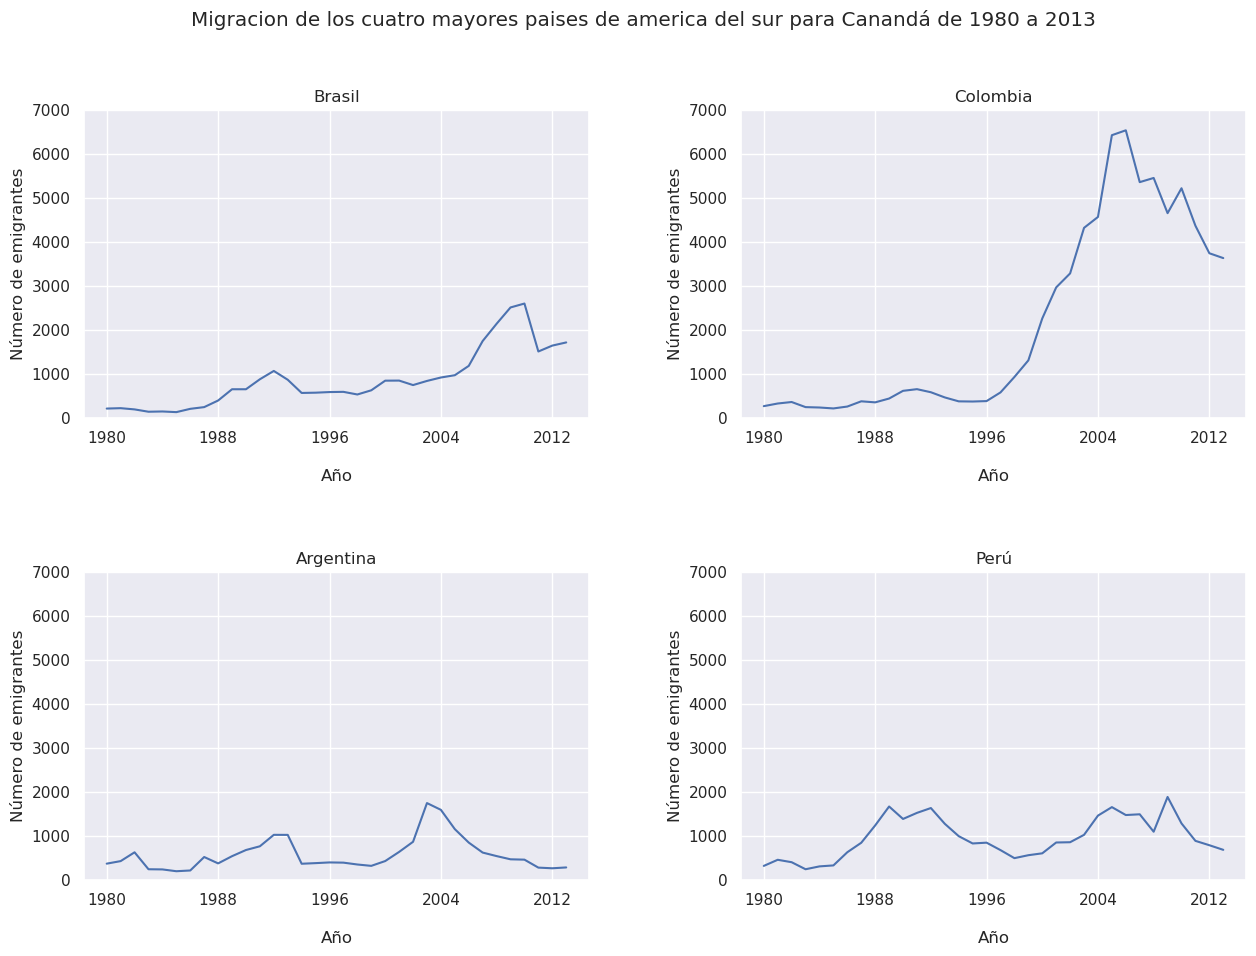

In [165]:
# Para comezar creamos una figura (fig), y axs(ejes)
fig, axs = plt.subplots(2,2, figsize=(15,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3) # Espaciamiento horizontal y vertical entre graficos
#------------------------
# Agregando un titulo general para la figura
fig.suptitle('Migracion de los cuatro mayores paises de america del sur para Canandá de 1980 a 2013 ')
#------------------------

# Creando el primer subplots
axs[0,0].plot(df.loc['Brasil', anos])
axs[0,0].set_title('Brasil')

# Creando segundo subplot
axs[0,1].plot(df.loc['Colômbia', anos])
axs[0,1].set_title('Colombia')

# Creando tercer subplot
axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')

# Creando el cuarto subplot
axs[1,1].plot(df.loc['Peru', anos])
axs[1,1].set_title('Perú')

for ax in axs.flat: # Loop que percorre todos los graficos
    ax.xaxis.set_major_locator(plt.MaxNLocator(5)) # para colocar una frecuencia de 5 años
    ax.set_xlabel('\nAño')
    ax.set_ylabel('Número de emigrantes')


#----------------------------------------
# Para resolver los limites en el eje Y establecemos  sus valores
ymin = 0 # Valor inicial
ymax = 7000 # Valor máximo

# Se crea un for para aplicar estos limites a nuestros plot
for ax in axs.ravel(): # ravel es un metodo que consigue transformar un array bidimencional en unidimesional
    ax.set_ylim(ymin, ymax) # set_ylim es colocar limites del eje Y
#----------------------------------------

plt.show()

## Personalizando vizualizaciones con Matplotlib
Ahora que ya conseguimos crear subplots, vamos a ver como personalizar aun más los gráficos. Tomaremos como base un grafico que ya habíamos creado antes para hacer personalizaciones en el.

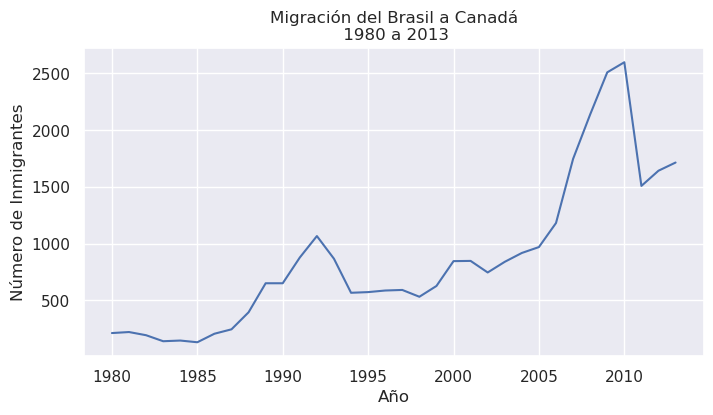

In [166]:
fig, ax = plt.subplots(figsize=(8,4)) # Esto dará las dimensiones de la figura
ax.plot(df_brasil['ano'], df_brasil['inmigrantes']) # Aqui pasamos los valores que tendrán los ejes ( x, y)
ax.set_title('Migración del Brasil a Canadá\n 1980 a 2013') # Usamos la funcion set_title para colocar un titulo. \n para salto de linea
ax.set_xlabel('Año')
ax.set_ylabel('Número de Inmigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Con esta linea cambiano a la frecuencia de 5 en 5 años para el eje x
plt.show() #Esto permite imprimir la figura sin mostrar datos de almacenamiento en memoria

#### Modificando el tamaño del titulo
con el paramentro fontsize



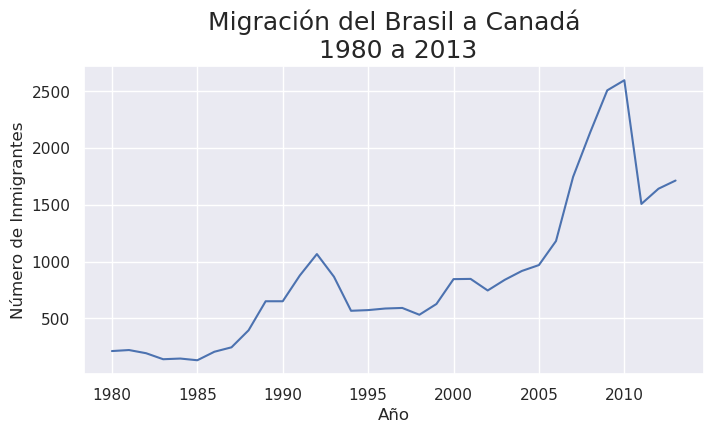

In [167]:
###### Modificando el tamaño del titulo ############
fig, ax = plt.subplots(figsize=(8,4)) # Esto dará las dimensiones de la figura
ax.plot(df_brasil['ano'], df_brasil['inmigrantes']) # Aqui pasamos los valores que tendrán los ejes ( x, y)
ax.set_title('Migración del Brasil a Canadá\n 1980 a 2013', fontsize=18) # Usamos la funcion set_title para colocar un titulo. \n para salto de linea
ax.set_xlabel('Año')
ax.set_ylabel('Número de Inmigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Con esta linea cambiano a la frecuencia de 5 en 5 años para el eje x
plt.show() #Esto permite imprimir la figura sin mostrar datos de almacenamiento en memoria

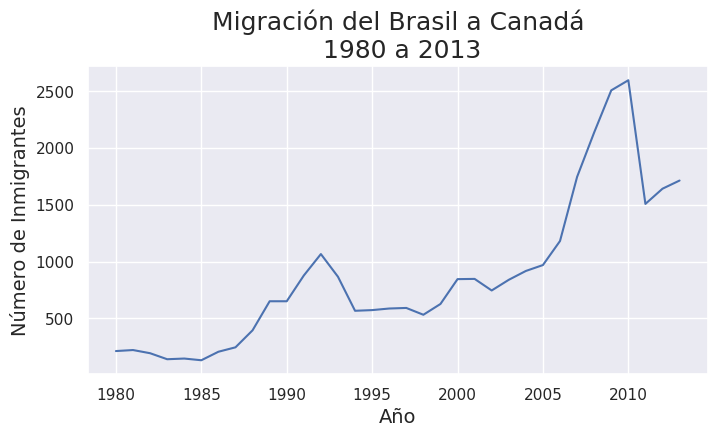

In [168]:
###### Modificando el tamaño de las etiquetas de ejes ############
fig, ax = plt.subplots(figsize=(8,4)) # Esto dará las dimensiones de la figura
ax.plot(df_brasil['ano'], df_brasil['inmigrantes']) # Aqui pasamos los valores que tendrán los ejes ( x, y)
ax.set_title('Migración del Brasil a Canadá\n 1980 a 2013', fontsize=18) # Usamos la funcion set_title para colocar un titulo. \n para salto de linea
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Número de Inmigrantes', fontsize=14)
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Con esta linea cambiano a la frecuencia de 5 en 5 años para el eje x
plt.show() #Esto permite imprimir la figura sin mostrar datos de almacenamiento en memoria

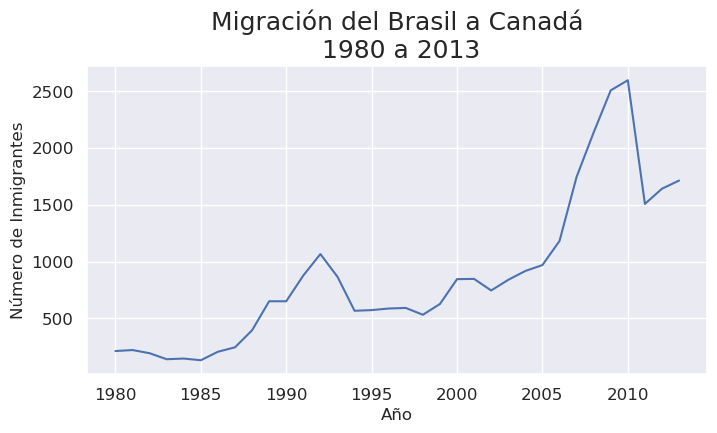

In [169]:
###### Modificando el tamaño de los ticks ############
fig, ax = plt.subplots(figsize=(8,4)) # Esto dará las dimensiones de la figura
ax.plot(df_brasil['ano'], df_brasil['inmigrantes']) # Aqui pasamos los valores que tendrán los ejes ( x, y)
ax.set_title('Migración del Brasil a Canadá\n 1980 a 2013', fontsize=18) # Usamos la funcion set_title para colocar un titulo. \n para salto de linea
ax.set_xlabel('Año')
ax.set_ylabel('Número de Inmigrantes')
ax.xaxis.set_tick_params(labelsize=12) #Cambios aqui
ax.yaxis.set_tick_params(labelsize=12) #Cambios aqui
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Con esta linea cambiano a la frecuencia de 5 en 5 años para el eje x
plt.show() #Esto permite imprimir la figura sin mostrar datos de almacenamiento en memoria

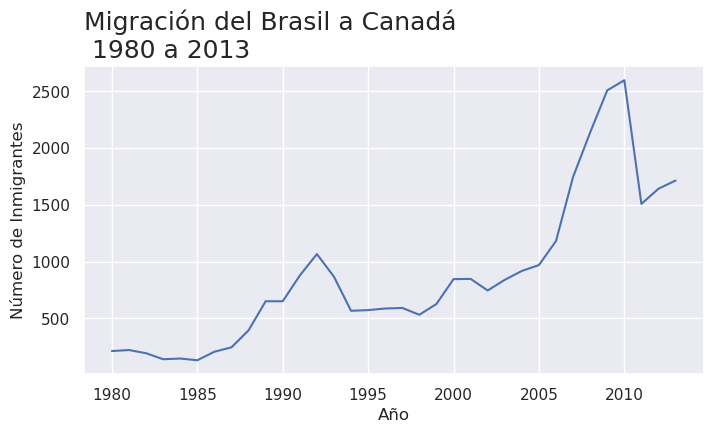

In [170]:
###### Modificando la posición del titulo ############
fig, ax = plt.subplots(figsize=(8,4)) # Esto dará las dimensiones de la figura
ax.plot(df_brasil['ano'], df_brasil['inmigrantes']) # Aqui pasamos los valores que tendrán los ejes ( x, y)
ax.set_title('Migración del Brasil a Canadá\n 1980 a 2013', fontsize=18, loc="left") #Paramentro loc para la ubicación
ax.set_xlabel('Año')
ax.set_ylabel('Número de Inmigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Con esta linea cambiano a la frecuencia de 5 en 5 años para el eje x
plt.show() #Esto permite imprimir la figura sin mostrar datos de almacenamiento en memoria

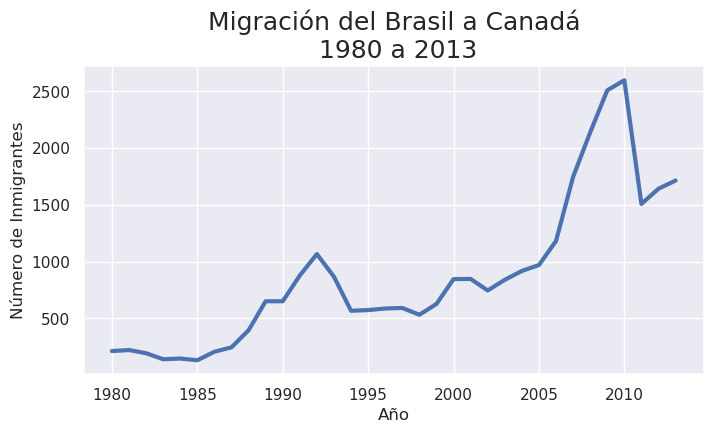

In [171]:
###### Modificando el espesor de la linea del gráfico ############
fig, ax = plt.subplots(figsize=(8,4)) # Esto dará las dimensiones de la figura
ax.plot(df_brasil['ano'], df_brasil['inmigrantes'], lw=3) # Parametro lw para el lineweigth
ax.set_title('Migración del Brasil a Canadá\n 1980 a 2013', fontsize=18) # Usamos la funcion set_title para colocar un titulo. \n para salto de linea
ax.set_xlabel('Año')
ax.set_ylabel('Número de Inmigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Con esta linea cambiano a la frecuencia de 5 en 5 años para el eje x
plt.show() #Esto permite imprimir la figura sin mostrar datos de almacenamiento en memoria

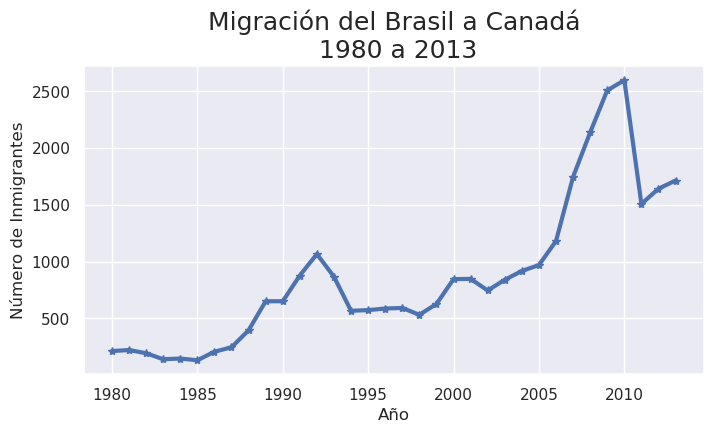

In [172]:
###### Agregando maracodres de posición gráfico ############
fig, ax = plt.subplots(figsize=(8,4)) # Esto dará las dimensiones de la figura
ax.plot(df_brasil['ano'], df_brasil['inmigrantes'], lw=3, marker='*') #Marker puede ser un circulo, cuadrado, triangulo...
ax.set_title('Migración del Brasil a Canadá\n 1980 a 2013', fontsize=18) # Usamos la funcion set_title para colocar un titulo. \n para salto de linea
ax.set_xlabel('Año')
ax.set_ylabel('Número de Inmigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Con esta linea cambiano a la frecuencia de 5 en 5 años para el eje x
plt.show() #Esto permite imprimir la figura sin mostrar datos de almacenamiento en memoria

## Símbolos más comunes para el parametro marker:
Símbolo	Descripción
'o'	Círculo
'.'	Punto
','	Pixel
'x'	X minúscula
'+'	Signo más
'v'	Triángulo hacia abajo
'^'	Triángulo hacia arriba
'<'	Triángulo hacia la izquierda
'>'	Triángulo hacia la derecha
'1'	Tri-down (como flor)
'2'	Tri-up (como flor)
'3'	Tri-left
'4'	Tri-right
's'	Cuadrado
'p'	Pentágono
'*'	Estrella
'h'	Hexágono 1
'H'	Hexágono 2
'D'	Diamante
'd'	Diamante pequeño
`'	'`
'_'	Línea horizontal

En algunos casos donde hay mucha información, los marcadores puede no ser de mucha ayuda porque saturan la linea. En esos caso podría ser mar practico solo usar un grid.

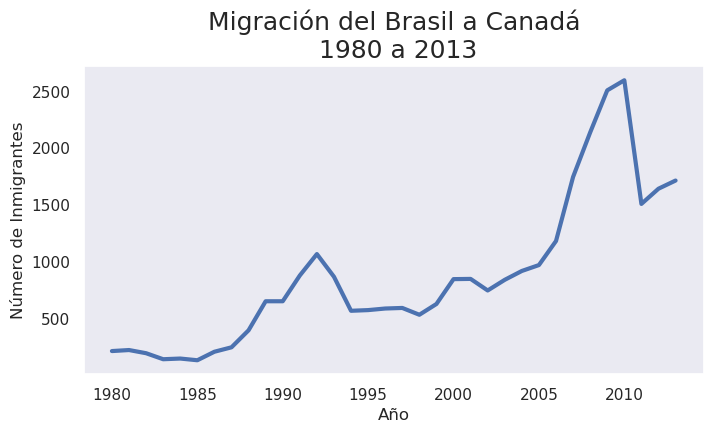

In [173]:
###### Agregando grid de posición gráfico ############
fig, ax = plt.subplots(figsize=(8,4)) # Esto dará las dimensiones de la figura
ax.plot(df_brasil['ano'], df_brasil['inmigrantes'], lw=3) #Marker puede ser un circulo, cuadrado, triangulo...
ax.set_title('Migración del Brasil a Canadá\n 1980 a 2013', fontsize=18) # Usamos la funcion set_title para colocar un titulo. \n para salto de linea
ax.set_xlabel('Año')
ax.set_ylabel('Número de Inmigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Con esta linea cambiano a la frecuencia de 5 en 5 años para el eje x
plt.grid()
plt.show() #Esto permite imprimir la figura sin mostrar datos de almacenamiento en memoria

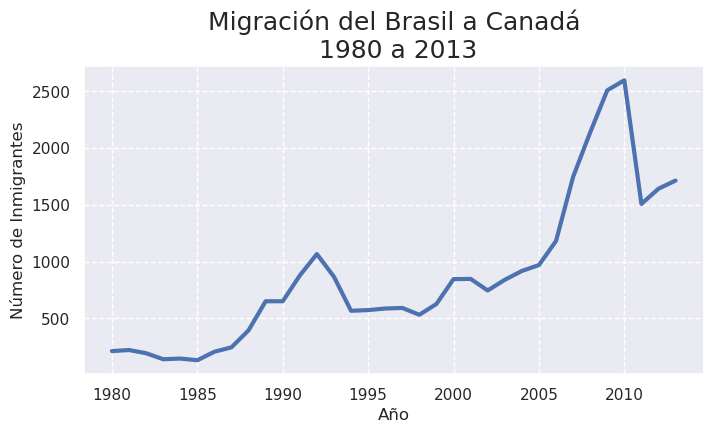

In [174]:
###### Personalizando el  grid de posición gráfico ############
fig, ax = plt.subplots(figsize=(8,4)) # Esto dará las dimensiones de la figura
ax.plot(df_brasil['ano'], df_brasil['inmigrantes'], lw=3) #Marker puede ser un circulo, cuadrado, triangulo...
ax.set_title('Migración del Brasil a Canadá\n 1980 a 2013', fontsize=18) # Usamos la funcion set_title para colocar un titulo. \n para salto de linea
ax.set_xlabel('Año')
ax.set_ylabel('Número de Inmigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Con esta linea cambiano a la frecuencia de 5 en 5 años para el eje x
plt.grid(linestyle='--')
plt.show() #Esto permite imprimir la figura sin mostrar datos de almacenamiento en memoria

## Alterando colores
Documentación https://matplotlib.org/stable/gallery/color/named_colors.html



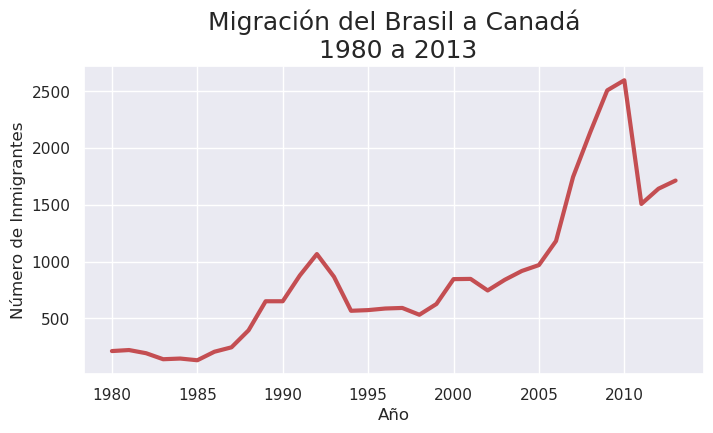

In [175]:
###### Personalizando el color de la linea del gráfico ############
fig, ax = plt.subplots(figsize=(8,4)) # Esto dará las dimensiones de la figura
ax.plot(df_brasil['ano'], df_brasil['inmigrantes'], lw=3, color="r") #Agreando el parametro color
ax.set_title('Migración del Brasil a Canadá\n 1980 a 2013', fontsize=18) # Usamos la funcion set_title para colocar un titulo. \n para salto de linea
ax.set_xlabel('Año')
ax.set_ylabel('Número de Inmigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Con esta linea cambiano a la frecuencia de 5 en 5 años para el eje x
plt.show() #Esto permite imprimir la figura sin mostrar datos de almacenamiento en memoria

In [176]:
df.head()

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argélia,África,Norte da África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


In [177]:
america_sur = df.query('"América do Sul" in Região').sort_values('Total')
america_sur.head()

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Suriname,América Latina e o Caribe,América do Sul,15,10,21,12,5,16,7,46,...,15,16,20,9,12,13,11,16,4,739
Paraguai,América Latina e o Caribe,América do Sul,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Uruguai,América Latina e o Caribe,América do Sul,128,132,146,105,90,92,137,269,...,217,175,147,160,99,93,81,47,58,4715
Equador,América Latina e o Caribe,América do Sul,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233


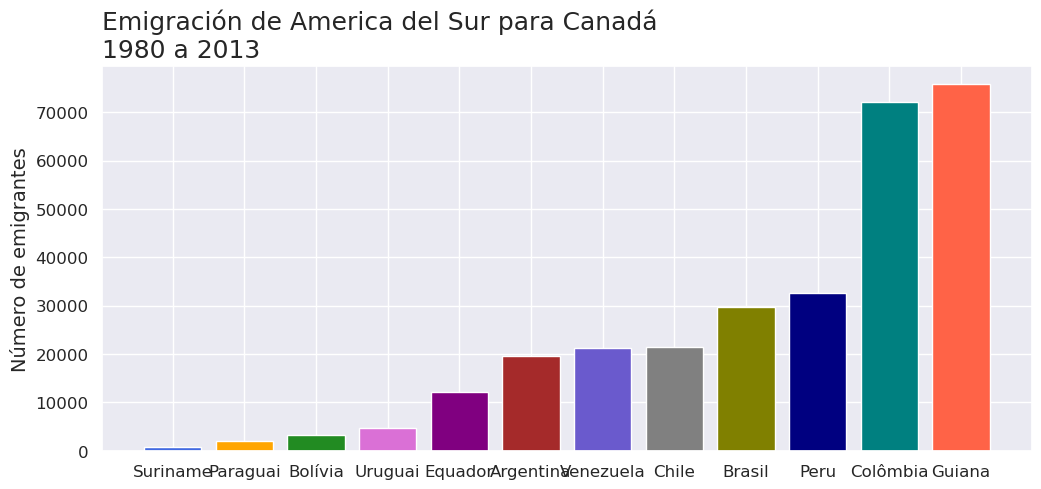

In [178]:
colores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(america_sur.index, america_sur['Total'], color=colores)
ax.set_title('Emigración de America del Sur para Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Número de emigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

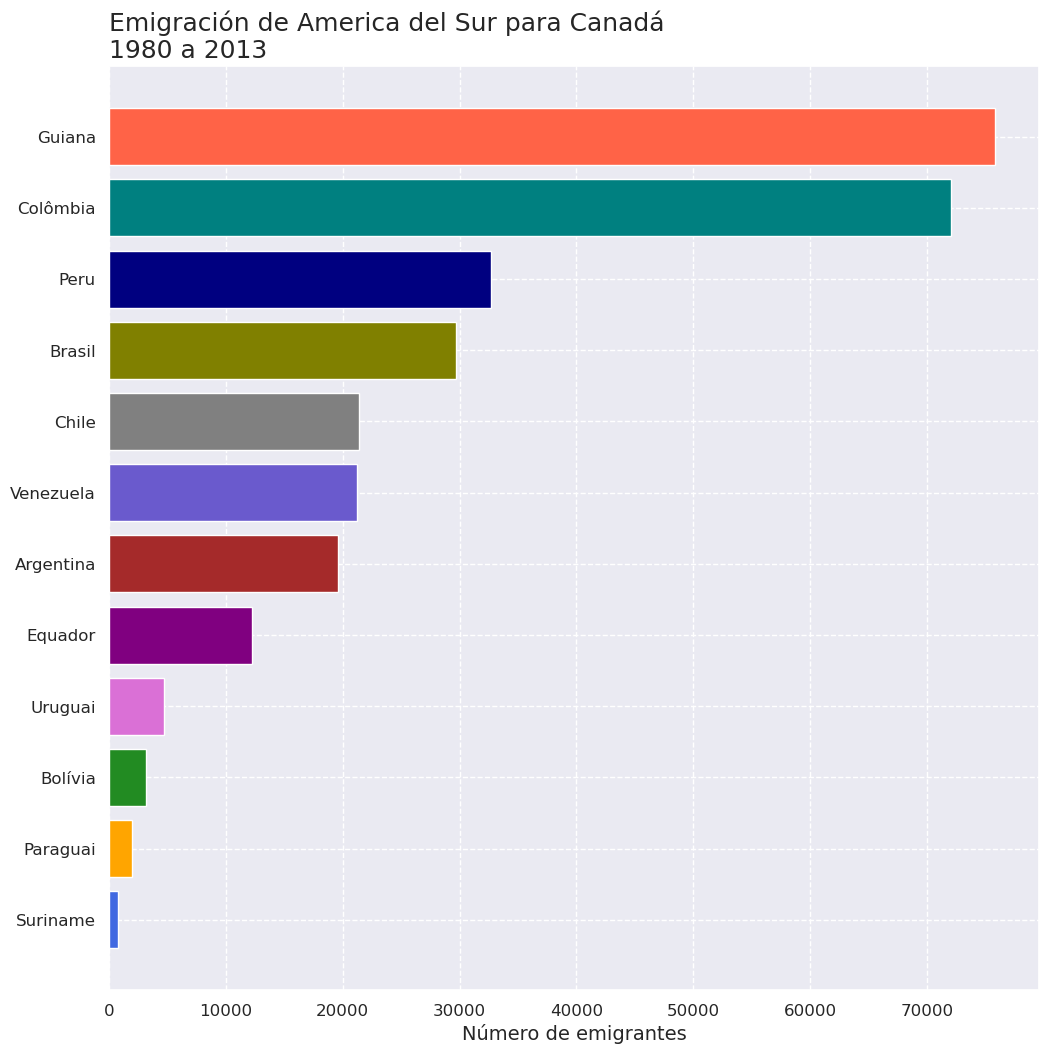

In [179]:
colores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']
fig, ax = plt.subplots(figsize=(12,12))
ax.barh(america_sur.index, america_sur['Total'], color=colores)
ax.set_title('Emigración de America del Sur para Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('Número de emigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(linestyle='--')
plt.show()

# Alterando colores 2


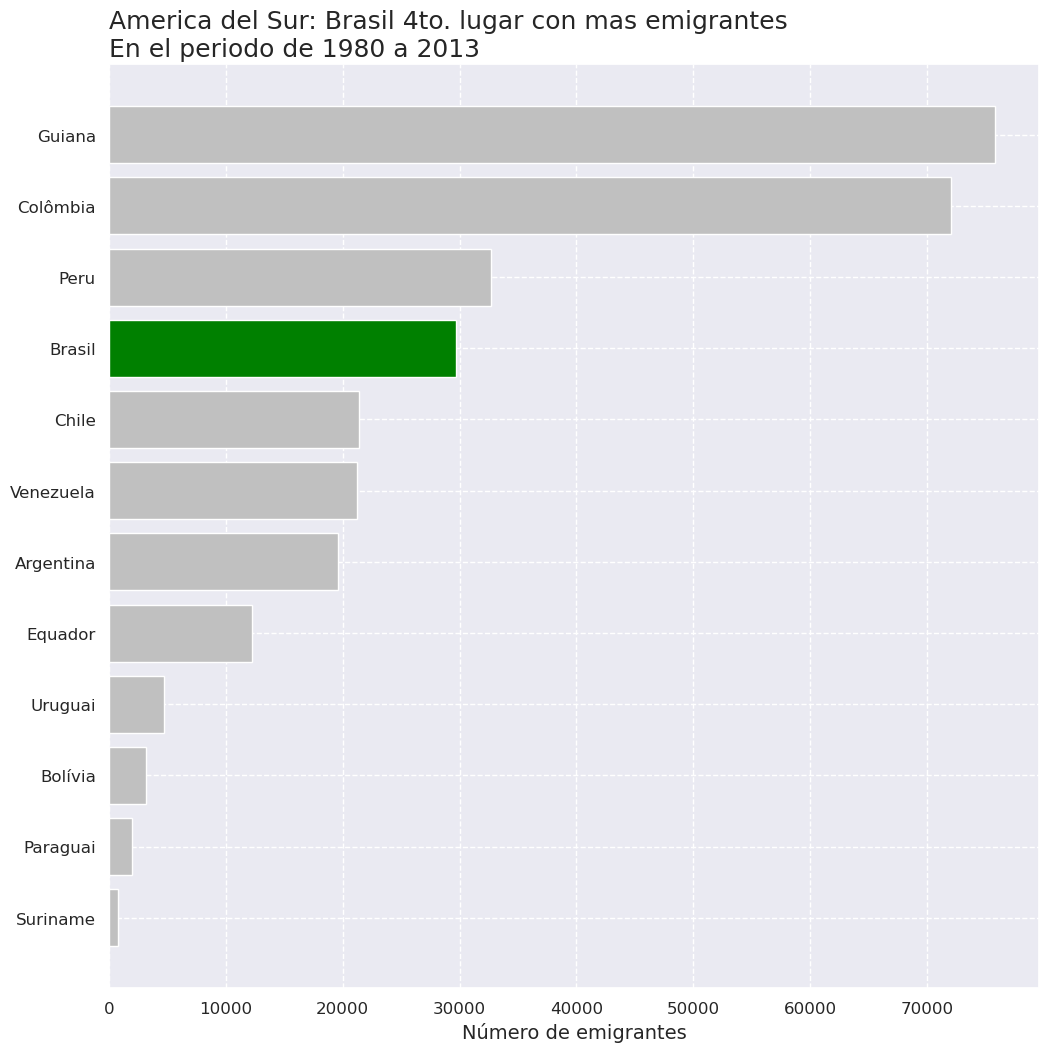

In [180]:
colores = []
for pais in america_sur.index:
    if pais == "Brasil":
        colores.append("green")
    else:
        colores.append("silver")
        
fig, ax = plt.subplots(figsize=(12,12))
ax.barh(america_sur.index, america_sur['Total'], color=colores)
ax.set_title('America del Sur: Brasil 4to. lugar con mas emigrantes\nEn el periodo de 1980 a 2013', loc='left', fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('Número de emigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(linestyle='--')
plt.show()

# Agregando anotaciones en el gráfico


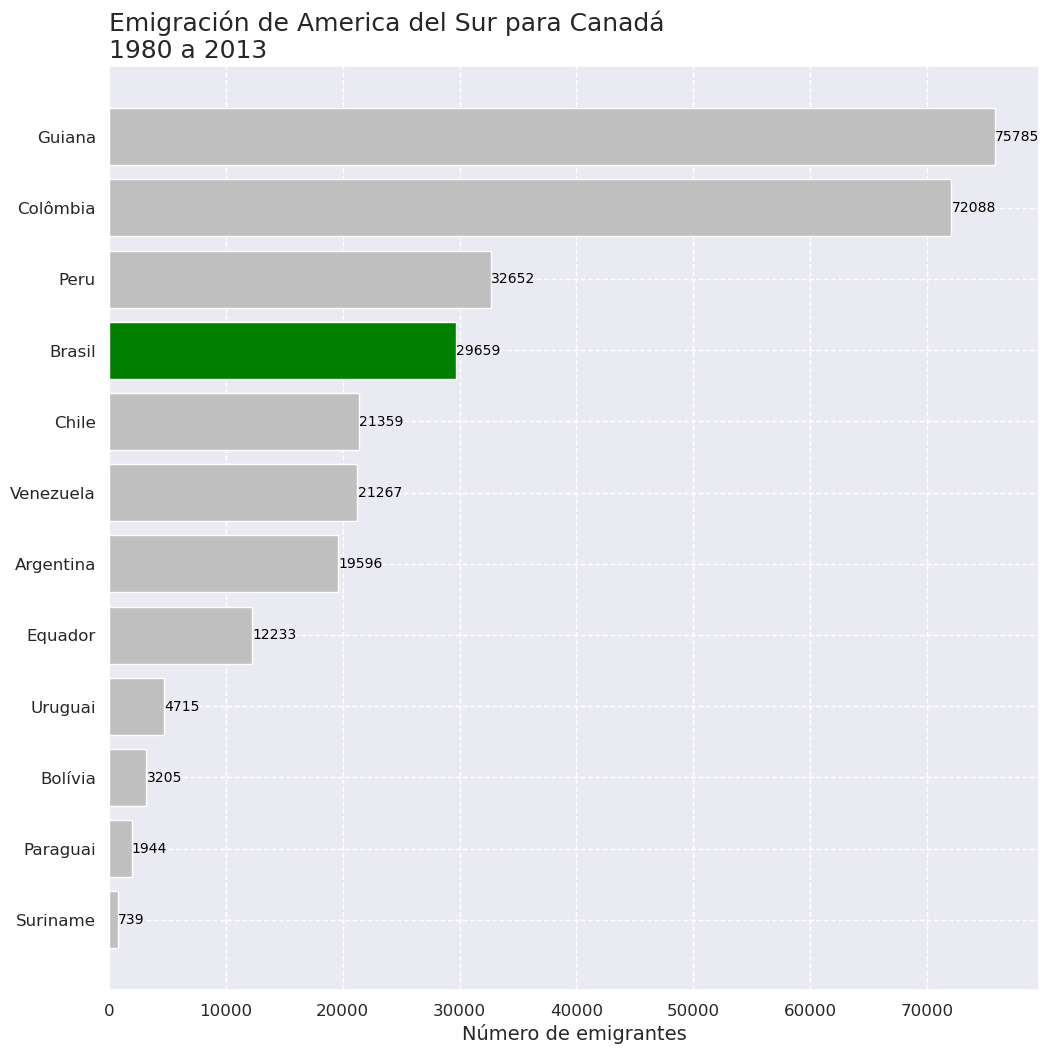

In [181]:
colores = []
for pais in america_sur.index:
    if pais == "Brasil":
        colores.append("green")
    else:
        colores.append("silver")
fig, ax = plt.subplots(figsize=(12,12))
ax.barh(america_sur.index, america_sur['Total'], color=colores)
ax.set_title('Emigración de America del Sur para Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('Número de emigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(linestyle='--')

for i, v in enumerate(america_sur['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')


plt.show()





### Quitar la caja del gráfico

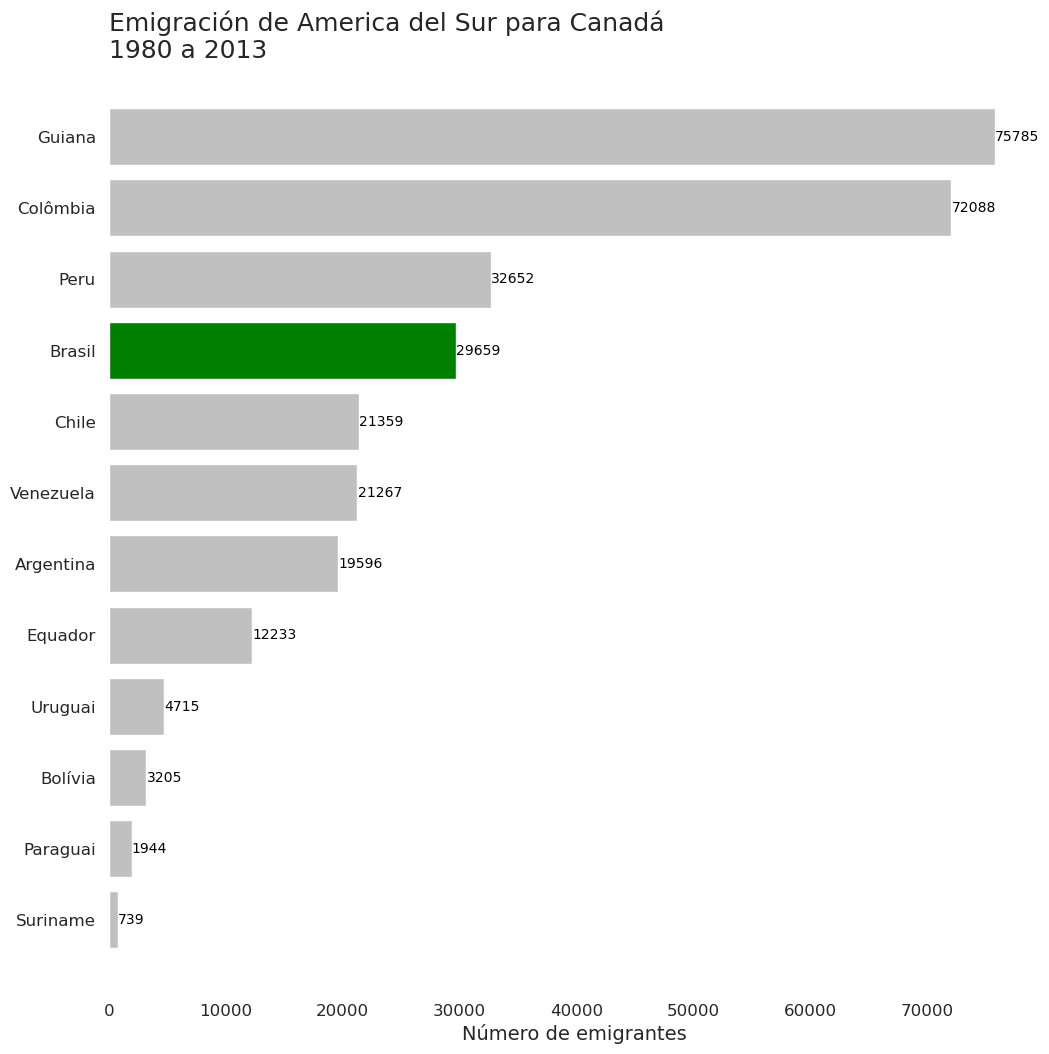

In [182]:
colores = []
for pais in america_sur.index:
    if pais == "Brasil":
        colores.append("green")
    else:
        colores.append("silver")
fig, ax = plt.subplots(figsize=(12,12))
ax.barh(america_sur.index, america_sur['Total'], color=colores)
ax.set_title('Emigración de America del Sur para Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('Número de emigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)


for i, v in enumerate(america_sur['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

ax.set_frame_on(False)
plt.show()





## quitando el eje x


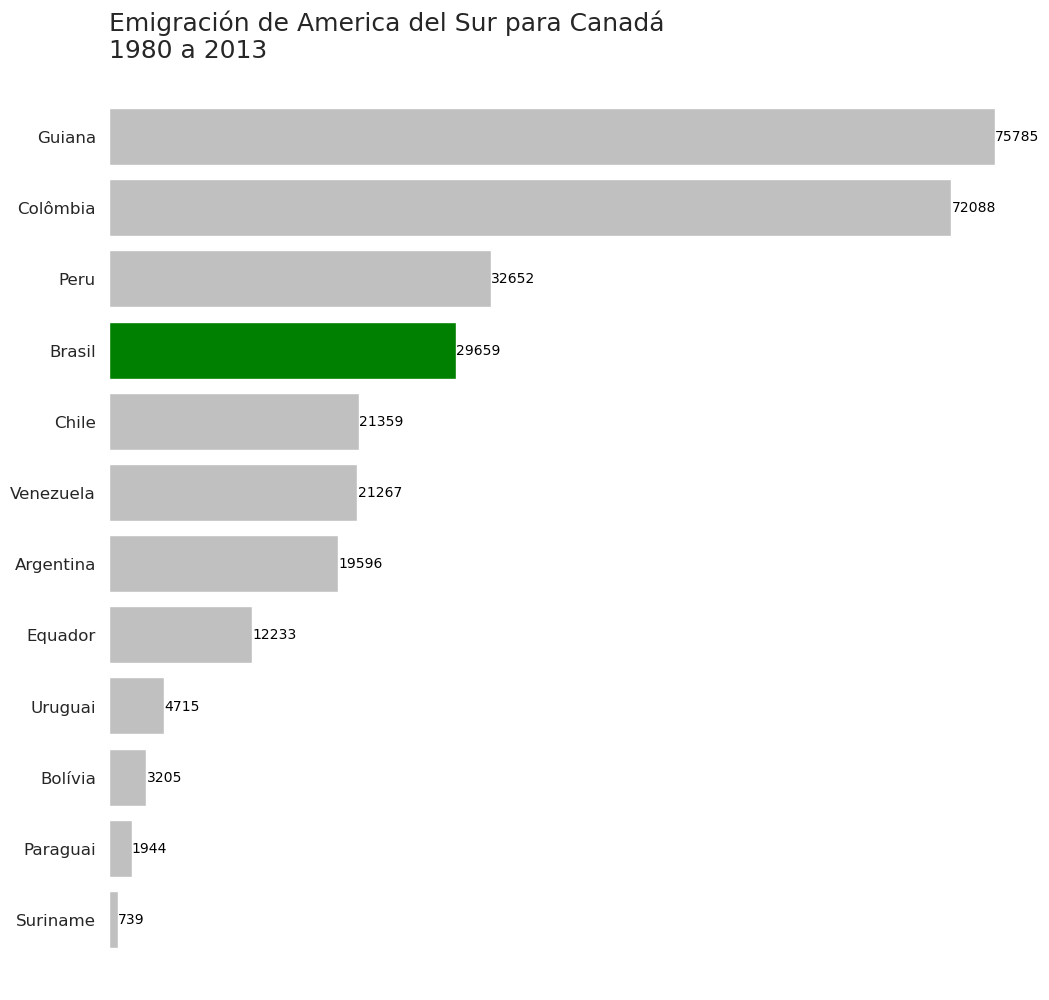

In [183]:
colores = []
for pais in america_sur.index:
    if pais == "Brasil":
        colores.append("green")
    else:
        colores.append("silver")
fig, ax = plt.subplots(figsize=(12,12))
ax.barh(america_sur.index, america_sur['Total'], color=colores)
ax.set_title('Emigración de America del Sur para Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('Número de emigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)


for i, v in enumerate(america_sur['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
plt.show()





## Quitar los ticks

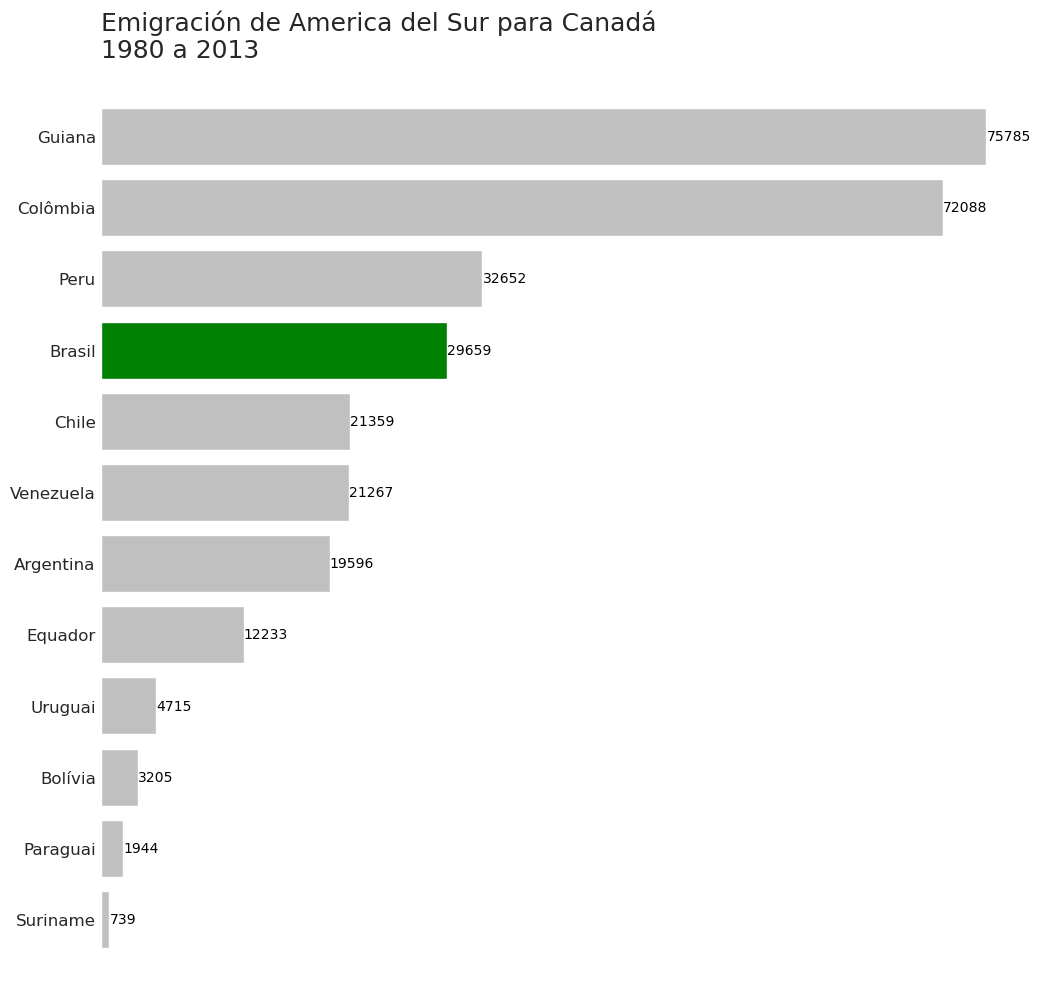

In [184]:
colores = []
for pais in america_sur.index:
    if pais == "Brasil":
        colores.append("green")
    else:
        colores.append("silver")
fig, ax = plt.subplots(figsize=(12,12))
ax.barh(america_sur.index, america_sur['Total'], color=colores)
ax.set_title('Emigración de America del Sur para Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('Número de emigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)


for i, v in enumerate(america_sur['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
plt.show()





## Guardar los gráficos

In [185]:
#Para saber que formatos de imagen tenemos disponibles para guardar nuestro gráficos podemos usar el siguiente codigo:
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


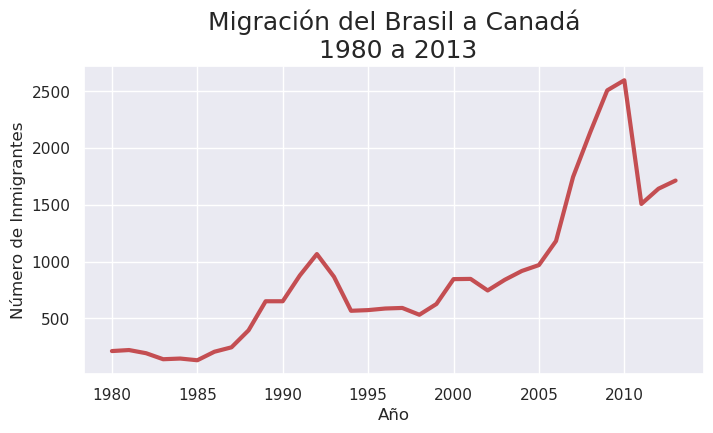

In [186]:
# La recomendación es usar formato png, pero depende de los requirimientos.
# Vamos a guardar el siguiente gráfico.
###### Personalizando el color de la linea del gráfico ############
fig, ax = plt.subplots(figsize=(8,4)) # Esto dará las dimensiones de la figura
ax.plot(df_brasil['ano'], df_brasil['inmigrantes'], lw=3, color="r") #Agreando el parametro color
ax.set_title('Migración del Brasil a Canadá\n 1980 a 2013', fontsize=18) # Usamos la funcion set_title para colocar un titulo. \n para salto de linea
ax.set_xlabel('Año')
ax.set_ylabel('Número de Inmigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Con esta linea cambiano a la frecuencia de 5 en 5 años para el eje x
plt.show() #Esto permite imprimir la figura sin mostrar datos de almacenamiento en memoria

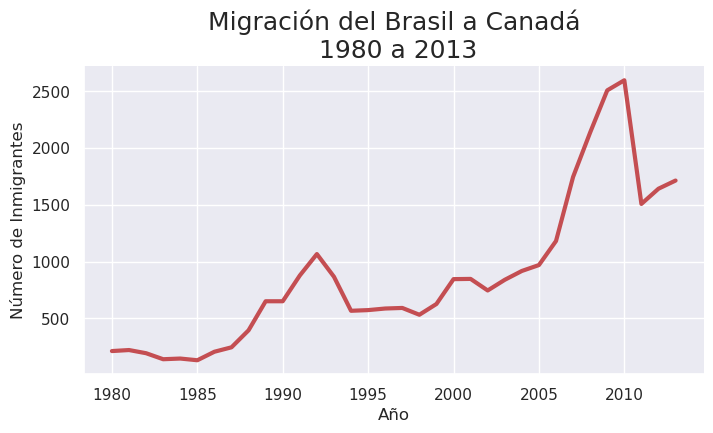

In [187]:
# Para mejorar el gráfico, vamos a realizar algunos ajustes.
###### Personalizando el color de la linea del gráfico ############
fig, ax = plt.subplots(figsize=(8,4)) # Esto dará las dimensiones de la figura
ax.plot(df_brasil['ano'], df_brasil['inmigrantes'], lw=3, color="r") #Agreando el parametro color
ax.set_title('Migración del Brasil a Canadá\n 1980 a 2013', fontsize=18) # Usamos la funcion set_title para colocar un titulo. \n para salto de linea
ax.set_xlabel('Año')
ax.set_ylabel('Número de Inmigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Con esta linea cambiano a la frecuencia de 5 en 5 años para el eje x
ax.spines['top'].set_visible(False) #Eliminando la linea del top
ax.spines['right'].set_visible(False) #Eliminando la linea derecha
plt.show() #Esto permite imprimir la figura sin mostrar datos de almacenamiento en memoria

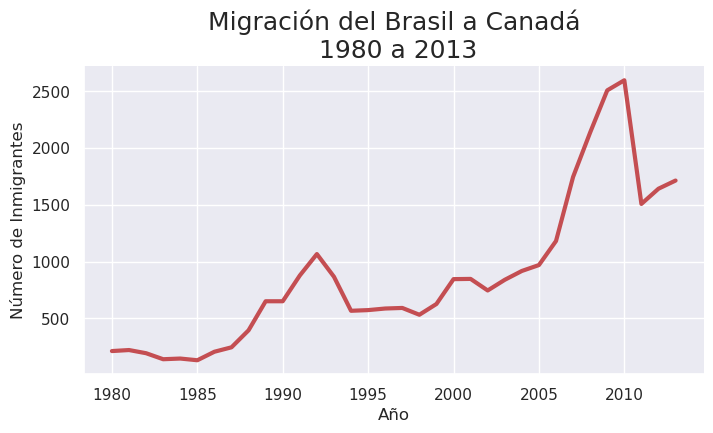

In [188]:
# Ahora vamos a guardar.. antes del plt.show agregaremos el código para salvar
###### Personalizando el color de la linea del gráfico ############
fig, ax = plt.subplots(figsize=(8,4)) # Esto dará las dimensiones de la figura
ax.plot(df_brasil['ano'], df_brasil['inmigrantes'], lw=3, color="r") #Agreando el parametro color
ax.set_title('Migración del Brasil a Canadá\n 1980 a 2013', fontsize=18) # Usamos la funcion set_title para colocar un titulo. \n para salto de linea
ax.set_xlabel('Año')
ax.set_ylabel('Número de Inmigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Con esta linea cambiano a la frecuencia de 5 en 5 años para el eje x
ax.spines['top'].set_visible(False) #Eliminando la linea del top
ax.spines['right'].set_visible(False) #Eliminando la linea derecha

fig.savefig('Emigración_Brasil_Canada.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show() #Esto permite imprimir la figura sin mostrar datos de almacenamiento en memoria

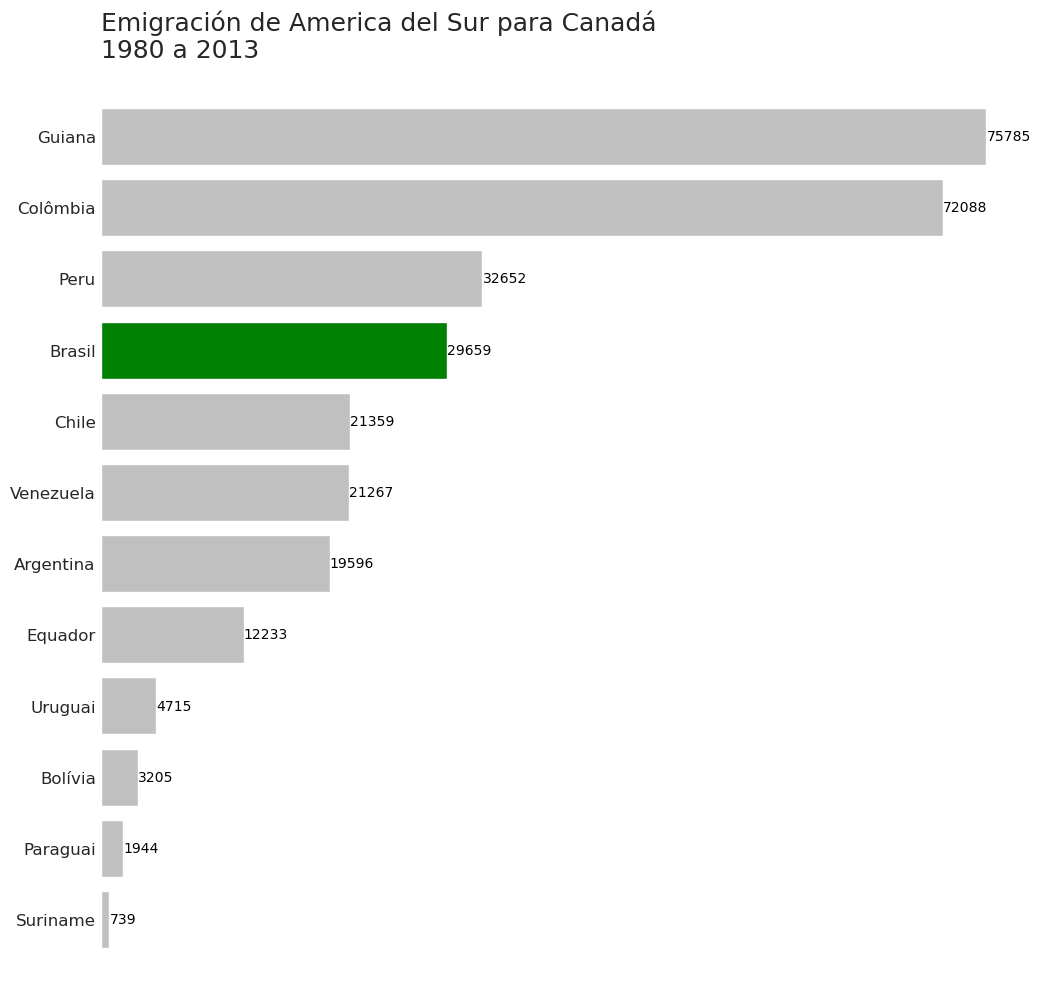

In [189]:
## Guardando la imagen del siguiente gráfico
colores = []
for pais in america_sur.index:
    if pais == "Brasil":
        colores.append("green")
    else:
        colores.append("silver")
fig, ax = plt.subplots(figsize=(12,12))
ax.barh(america_sur.index, america_sur['Total'], color=colores)
ax.set_title('Emigración de America del Sur para Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('Número de emigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)


for i, v in enumerate(america_sur['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

fig.savefig('Migración_america_del_sur.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()


## Criando o primeiro gráfico com Seaborn


#Importando biblioteca Seaborn como sns


In [190]:
import seaborn as sns

In [191]:
#Usando tema de la biblioteca Seaborn.  
#Usaremos el tema patron
sns.set_theme()

<Axes: xlabel='País', ylabel='Total'>

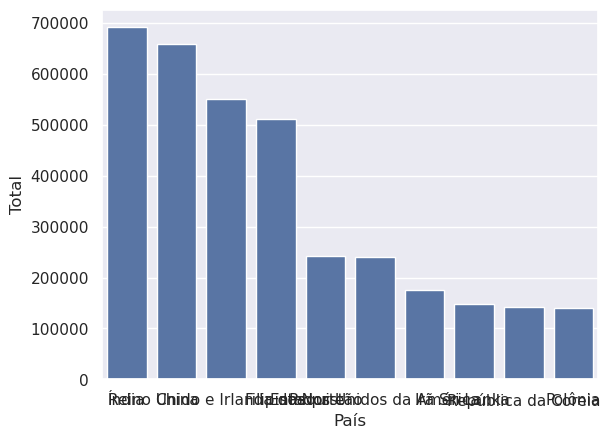

In [192]:
# Vamos a plotar un grafico de barras con Seaborn
top10 = df.sort_values('Total', ascending=False).head(10)



sns.barplot(data=top10, x=top10.index, y='Total')

<Axes: xlabel='Total', ylabel='País'>

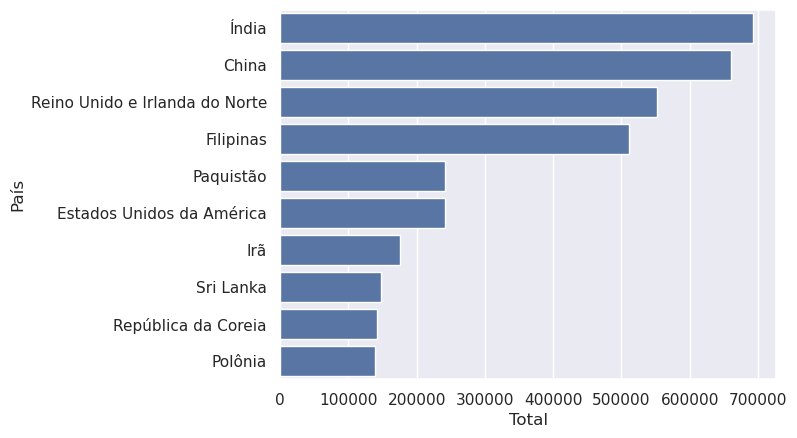

In [193]:
# En vista que el grafico vertical tapa los  nombres de los paises lo crearemos horizontal
sns.barplot(data=top10, y=top10.index, x='Total', orient='h')

## Personalizando un gráfico de Seaborn

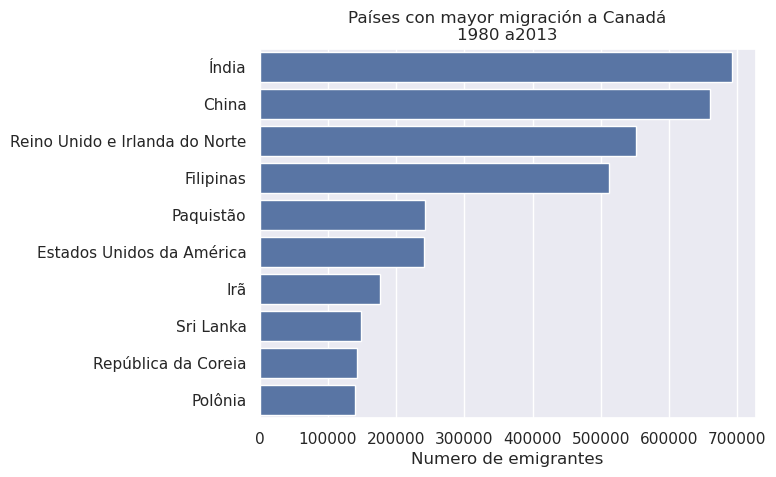

In [194]:
#Agregando un titulo
ax = sns.barplot(data=top10, y=top10.index, x='Total', orient='h')
ax.set(title="Países con mayor migración a Canadá\n1980 a2013", xlabel='Numero de emigrantes',  ylabel='')
plt.show()

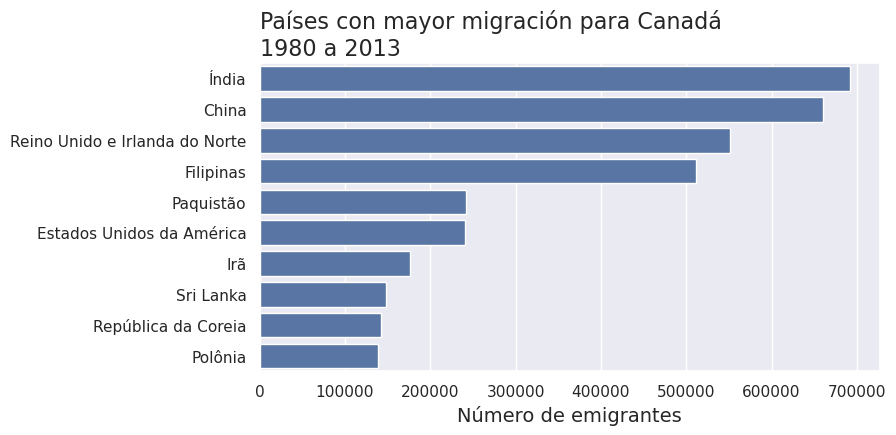

In [195]:
# Persnalizando usando una figura para poder personalizar mas el gráfico
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(data=top10, y=top10.index, x='Total', orient='h')
ax.set_title('Países con mayor migración para Canadá\n1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de emigrantes', fontsize=14)
ax.set_ylabel('')
plt.show()